In [2]:
import pandas as pd
import matplotlib.pyplot as plt

### 1. Lecture des données

In [3]:
data = pd.read_excel('Capital.xls')

data.columns = ['Ville', 'Taux', 'Region']

print(data.shape)
data.head()

(100, 3)


,Ville,Taux,Region
0,Aix en provence,18.94,Sud-Est
1,Ajaccio,22.06,Sud-Est
2,Amiens,17.97,Nord
3,Angers,18.86,Ouest
4,Annecy,14.97,Sud-Est


### 2. Affichage en Histogramme

<BarContainer object of 7 artists>

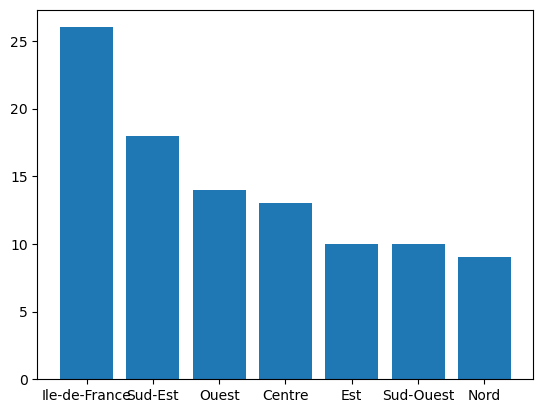

In [4]:
#print(data)
#Compter le nombre de Regions distinctes
regions = data['Region'].value_counts()
#Chaque région sur le nombre de données total *100 pour avoir le pourcentage
pourcentage = regions / len(data) * 100

plt.bar(pourcentage.index, pourcentage.values)

### 3. Affichage en Camembert

([<matplotlib.patches.Wedge at 0x197bb8c6d08>,
 [Text(0.7530018405458981, 0.8018654676031947, 'Ile-de-France'),
  Text(-0.6465637441936393, 0.8899187180267096, 'Sud-Est'),
  Text(-1.097829402176445, -0.06906955709217573, 'Ouest'),
  Text(-0.6741977818040066, -0.8691704959388332, 'Centre'),
  Text(0.06906953139562373, -1.0978294037931344, 'Est'),
  Text(0.701166365710689, -0.8475645860912692, 'Sud-Ouest'),
  Text(1.056323050796661, -0.306890228511165, 'Nord')],
 [Text(0.41072827666139894, 0.437381164147197, '26.0%'),
  Text(-0.3526711331965305, 0.4854102098327506, '18.0%'),
  Text(-0.5988160375507882, -0.037674303868459484, '14.0%'),
  Text(-0.3677442446203672, -0.47409299778481806, '13.0%'),
  Text(0.0376742898521584, -0.5988160384326188, '10.0%'),
  Text(0.3824543812967394, -0.46230795604978314, '10.0%'),
  Text(0.5761762095254513, -0.16739467009699907, '9.0%')])

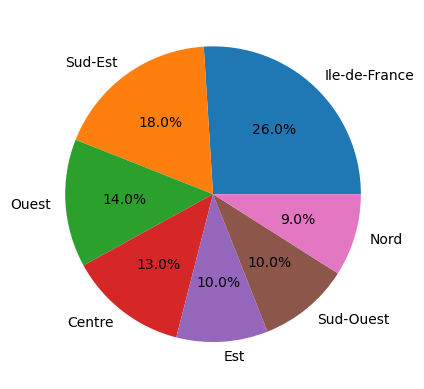

In [5]:
plt.pie(pourcentage, labels=pourcentage.index, autopct='%1.1f%%')

<AxesSubplot:>

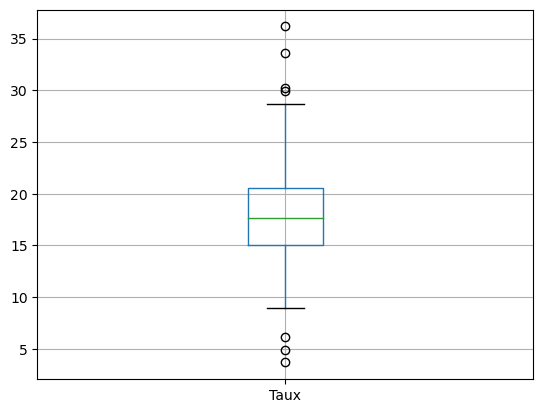

In [6]:
data.boxplot()

In [7]:
#data.groupby('Region').hist()

<AxesSubplot:ylabel='Density'>

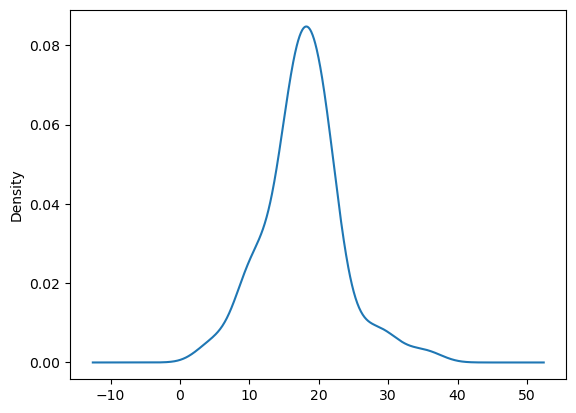

In [8]:
data['Taux'].plot.kde()

### 4. La région la plus représentée est l'Ile de France avec **26%**

### 5. Statistiques descriptives regroupées par régions

$$mean:=m=\frac{1}{n}\sum_{i=1}^nx_i,\;variance:=var=\frac{1}{n-1}\sum_{i=1}^n\left(x_i-m\right)^2,\;ecart\_type:=std=\sqrt{var}$$

Proportion de données pour chaque région

In [9]:
print(pourcentage)

Ile-de-France    26.0
Sud-Est          18.0
Ouest            14.0
Centre           13.0
Est              10.0
Sud-Ouest        10.0
Nord              9.0
Name: Region, dtype: float64


Statistiques sur les taxes d'habitation

In [10]:
print(data['Taux'].describe())

count    100.000000
mean      17.770700
std        5.529599
min        3.680000
25%       15.062500
50%       17.625000
75%       20.522500
max       36.170000
Name: Taux, dtype: float64


Statistiques sur les taxes d'habitation regroupées par régions

In [11]:
print(data.groupby('Region')['Taux'].describe())

               count       mean       std    min      25%     50%      75%  \
Region                                                                       
Centre          13.0  18.115385  1.906881  15.77  17.0700  17.370  19.1900   
Est             10.0  17.662000  2.095200  14.98  16.3875  16.975  18.1850   
Ile-de-France   26.0  11.764615  3.879327   3.68   9.2425  11.285  14.7375   
Nord             9.0  25.951111  7.099798  15.37  20.4600  27.970  29.9600   
Ouest           14.0  18.896429  3.098314  14.00  16.6875  18.265  21.0900   
Sud-Est         18.0  19.769444  2.938534  14.30  18.7675  19.575  21.4225   
Sud-Ouest       10.0  20.511000  4.549406  12.72  19.2700  21.010  21.9325   

                 max  
Region                
Centre         21.55  
Est            22.04  
Ile-de-France  19.32  
Nord           36.17  
Ouest          25.99  
Sud-Est        25.98  
Sud-Ouest      30.23  


Autre méthode

In [12]:
stats = data.groupby('Region')['Taux'].agg(['count', 'mean', 'median', 'std', 'min', 'max', 'var', 'quantile'])
stats.sort_values(by='mean')

,count,mean,median,std,min,max,var,quantile
Region,,,,,,,,
Ile-de-France,26,11.764615,11.285,3.879327,3.68,19.32,15.049178,11.285
Est,10,17.662000,16.975,2.095200,14.98,22.04,4.389862,16.975
Centre,13,18.115385,17.370,1.906881,15.77,21.55,3.636194,17.370
Ouest,14,18.896429,18.265,3.098314,14.00,25.99,9.599548,18.265
Sud-Est,18,19.769444,19.575,2.938534,14.30,25.98,8.634982,19.575
Sud-Ouest,10,20.511000,21.010,4.549406,12.72,30.23,20.697099,21.010
Nord,9,25.951111,27.970,7.099798,15.37,36.17,50.407136,27.970


### 6. Meilleur taux de taxe d'habitation
La région la moins taxée en moyenne est **l'Ile de France** avec une moyenne de **11.76** suivi de la région **Est** avec une moyenne de **17.66**

In [13]:
stats.idxmin()

count                Nord
mean        Ile-de-France
median      Ile-de-France
std                Centre
min         Ile-de-France
max         Ile-de-France
var                Centre
quantile    Ile-de-France
dtype: object

### 7. La région la plus représentative

In [14]:
stats['mean'].sort_values()

Region
Ile-de-France    11.764615
Est              17.662000
Centre           18.115385
Ouest            18.896429
Sud-Est          19.769444
Sud-Ouest        20.511000
Nord             25.951111
Name: mean, dtype: float64

### 8. Typologie des villes francaises en 3 groupes

1. Au dessus du premier quartile et en dessous du troisieme quartile
2. Au dessus du troisieme quartile
3. En dessous du premier quartile

In [15]:
#Les villes en dessous du premier quartile
data[data['Taux'] < data['Taux'].quantile(0.33)]

,Ville,Taux,Region
4,Annecy,14.97,Sud-Est
5,Antibes,14.30,Sud-Est
6,Antony,11.07,Ile-de-France
9,Asnières-sur-Seine,10.13,Ile-de-France
10,Aubervilliers,12.45,Ile-de-France
11,Aulnay-sous-Bois,15.59,Ile-de-France
13,Beauvais,15.37,Nord
19,Boulogne-Billancourt,9.46,Ile-de-France
20,Bourges,15.77,Centre
22,Brive-la-Gaillarde,15.82,Centre


In [16]:
#Les villes au dessus du troisième quartile
data[data['Taux'] > data['Taux'].quantile(0.66)]

,Ville,Taux,Region
1,Ajaccio,22.06,Sud-Est
8,Arles,24.49,Sud-Est
12,Avignon,22.41,Sud-Est
15,Besançon,20.20,Est
16,Béziers,22.14,Sud-Ouest
18,Bordeaux,22.11,Sud-Ouest
21,Brest,25.99,Ouest
24,Calais,23.36,Nord
25,Cannes,19.72,Sud-Est
39,Dunkerque,28.69,Nord


In [20]:
#Valeurs entre les 2 quartiles
data[(data['Taux'] > data['Taux'].quantile(0.33)) & (data['Taux'] < data['Taux'].quantile(0.66))]

,Ville,Taux,Region
0,Aix en provence,18.94,Sud-Est
2,Amiens,17.97,Nord
3,Angers,18.86,Ouest
7,Argenteuil,16.90,Ile-de-France
14,Belfort,16.20,Est
17,Blois,17.07,Centre
26,Chalon-sur-Saone,17.30,Centre
27,Chambéry,18.71,Sud-Est
29,Charleville-Mézières,17.30,Est
30,Chateauroux,17.37,Centre


### 9. Villes 30% au dessus et en dessous de la moyenne

In [18]:
#Villes avec un taux d'habitation au 30% dessus de la moyenne
data[data['Taux'] > data['Taux'].mean() + data['Taux']*0.3]

,Ville,Taux,Region
21,Brest,25.99,Ouest
39,Dunkerque,28.69,Nord
45,La Seyne-sur-Mer,25.98,Sud-Est
49,Lille,36.17,Nord
66,Nimes,30.23,Sud-Ouest
78,Roubaix,27.97,Nord
91,Tourcoing,33.61,Nord
97,Villeneuve-d'Asq,29.96,Nord


In [19]:
#Villes avec un taux d'habitation au 30% dessous de la moyenne
data[data['Taux'] < data['Taux'].mean() - data['Taux']*0.3]

,Ville,Taux,Region
6,Antony,11.07,Ile-de-France
9,Asnières-sur-Seine,10.13,Ile-de-France
10,Aubervilliers,12.45,Ile-de-France
19,Boulogne-Billancourt,9.46,Ile-de-France
35,Courbevoie,4.86,Ile-de-France
38,Drancy,10.42,Ile-de-France
41,Fontenay-sous-Bois,12.10,Ile-de-France
43,Ivry-sur-Seine,9.16,Ile-de-France
53,Maisons-Alfort,10.30,Ile-de-France
57,Montauban,12.72,Sud-Ouest


### 10. Villes situés à 20% au dessus ou en dessous de la moyenne

In [24]:
#20% au dessus de la moyenne
data[data['Taux'] > data['Taux'].mean() - data['Taux']*0.2]

,Ville,Taux,Region
0,Aix en provence,18.94,Sud-Est
1,Ajaccio,22.06,Sud-Est
2,Amiens,17.97,Nord
3,Angers,18.86,Ouest
4,Annecy,14.97,Sud-Est
...,...,...,...
93,Troyes,18.11,Est
94,Valence,16.25,Sud-Est
95,Vénissieux,18.70,Sud-Est
97,Villeneuve-d'Asq,29.96,Nord


In [1]:
#20% En dessous de la moyenne
data[data['Taux'] < data['Taux'].mean() - data['Taux']*0.2]

NameError: name 'data' is not defined